In [1]:
%pip install pandas seaborn matplotlib datasets


import pandas as pd
import seaborn as sns
from datasets import load_dataset  
import matplotlib.pyplot as plt
 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Note: you may need to restart the kernel to use updated packages.


c:\Users\USER\anaconda3\envs\first-project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

C:\Users\USER\AppData\Local\Temp\ipykernel_26000\742590320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month


In [3]:
df_DA.loc[:, 'job_skills'] = df_DA['job_skills'].apply(lambda x: x.split(',') if isinstance(x, str) else x)


# Now explode the column
df_skills = df_DA.explode('job_skills')
df_skills["job_skills"] = df_skills["job_skills"].str.replace(r"[\[\]]", "", regex=True)
df_skills.head()



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'r',"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'python',"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'sql',"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'nosql',"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'power bi',"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [4]:
df_skills_pivot = df_skills.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_skills_pivot

job_skills,'airflow','airtable','alteryx','angular','angular.js','ansible','apl','arch','asana','asp.net core',...,'visual basic','vmware','vue','watson','webex','windows','wire','word','workfront','zoom'
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,195,16,520,56,2,20,1,0,28,1,...,41,5,26,10,0,68,0,305,0,40
2,168,2,427,35,0,14,0,3,27,0,...,38,2,46,4,2,50,0,200,0,4
3,181,3,423,33,0,23,2,1,17,0,...,40,3,35,2,0,55,1,161,0,5
4,152,3,396,22,0,11,2,9,9,1,...,37,2,29,3,3,37,1,173,0,6
5,128,8,293,30,0,19,1,2,8,0,...,28,0,25,4,3,30,0,130,1,2
6,164,9,374,28,0,12,2,4,16,0,...,21,4,24,3,4,38,1,172,0,5
7,206,4,340,15,0,8,0,5,19,0,...,26,4,34,6,2,38,1,156,0,1
8,195,3,386,20,0,12,3,2,13,3,...,31,5,29,4,3,50,0,192,0,2
9,117,4,290,21,0,14,0,8,12,0,...,36,3,18,1,0,46,3,143,0,1


In [5]:
df_skills_pivot.loc['total'] = df_skills_pivot.sum()
df_skills_pivot = df_skills_pivot[df_skills_pivot.loc['total'].sort_values(ascending=False).index]
df_skills_pivot= df_skills_pivot.drop('total')
df_skills_pivot



job_skills,'sql','excel','tableau','python','power bi','r','sas','sql','python','excel',...,'bitbucket','suse','ovh','nuxt.js','gtx','erlang','redhat','msaccess','scikit-learn','workfront'
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,8641,6235,5210,4610,3873,2809,2990,2695,1996,1935,...,0,0,0,1,0,0,0,0,0,0
2,6132,4442,3652,3292,2974,2037,2072,1815,1459,1330,...,0,0,0,0,0,0,0,0,0,0
3,6030,4402,3790,3255,2861,2072,2001,1838,1486,1273,...,0,1,0,0,0,0,0,0,0,0
4,5712,4305,3547,3097,2827,1896,2018,1841,1460,1191,...,0,0,1,0,0,0,0,0,0,0
5,5085,3692,3067,2891,2470,1632,1488,1532,1179,1081,...,0,0,0,0,0,0,0,1,0,1
6,5755,4390,3581,3181,2952,1922,1703,1829,1526,1334,...,0,0,0,0,0,1,0,0,0,0
7,5799,4231,3670,3324,3033,1968,1646,1888,1507,1282,...,0,0,0,0,1,0,0,0,0,0
8,6671,4953,4240,3799,3538,2399,2028,2152,1777,1529,...,0,0,0,0,0,0,0,0,1,0
9,5245,3704,3245,2825,2854,1760,1496,1584,1404,1182,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Ensure job_posted_month_no is numeric
df_DA['job_posted_month_no'] = pd.to_numeric(df_DA['job_posted_month_no'], errors='coerce')

# Count job postings per month
da_total = df_DA.groupby('job_posted_month_no').size().reindex(range(1, 13), fill_value=0)

# Calculate percentages based on the total count
df_DA_perc = df_skills_pivot.div(da_total / 100, axis=0)

# Reset the index for easier handling
df_DA_perc = df_DA_perc.reset_index()

# Convert numeric month to month name
df_DA_perc['job_posted_month'] = df_DA_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Check the result
print(df_DA_perc.head())


job_skills  job_posted_month_no      'sql'    'excel'   'tableau'   'python'  \
0                             1  36.637693  26.436294   22.090312  19.546322   
1                             2  37.033458  26.826911   22.055804  19.881628   
2                             3  37.123684  27.100905   23.333128  20.039402   
3                             4  36.818358  27.749130   22.863220  19.962614   
4                             5  37.882739  27.505029   22.848842  21.537659   

job_skills   'power bi'        'r'      'sas'      'sql'  'python'  ...  \
0             16.421454  11.910112  12.677549  11.426754  8.463006  ...   
1             17.961106  12.302210  12.513589  10.961469  8.811451  ...   
2             17.613741  12.756264  12.319153  11.315644  9.148556  ...   
3             18.222251  12.221220  13.007606  11.866701  9.410855  ...   
4             18.401252  12.158236  11.085450  11.413246  8.783431  ...   

job_skills    'suse'     'ovh'   'nuxt.js'   'gtx'   'erlang'  'redh

C:\Users\USER\AppData\Local\Temp\ipykernel_26000\4263663692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA['job_posted_month_no'] = pd.to_numeric(df_DA['job_posted_month_no'], errors='coerce')


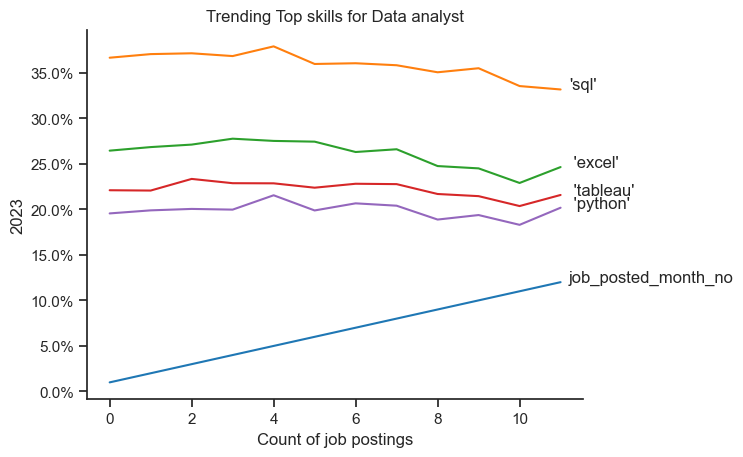

In [16]:
df_plot = df_DA_perc.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.xlabel('Count of job postings')  # x-axis label
plt.ylabel('2023')  # y-axis label
plt.title('Trending Top skills for Data analyst')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

